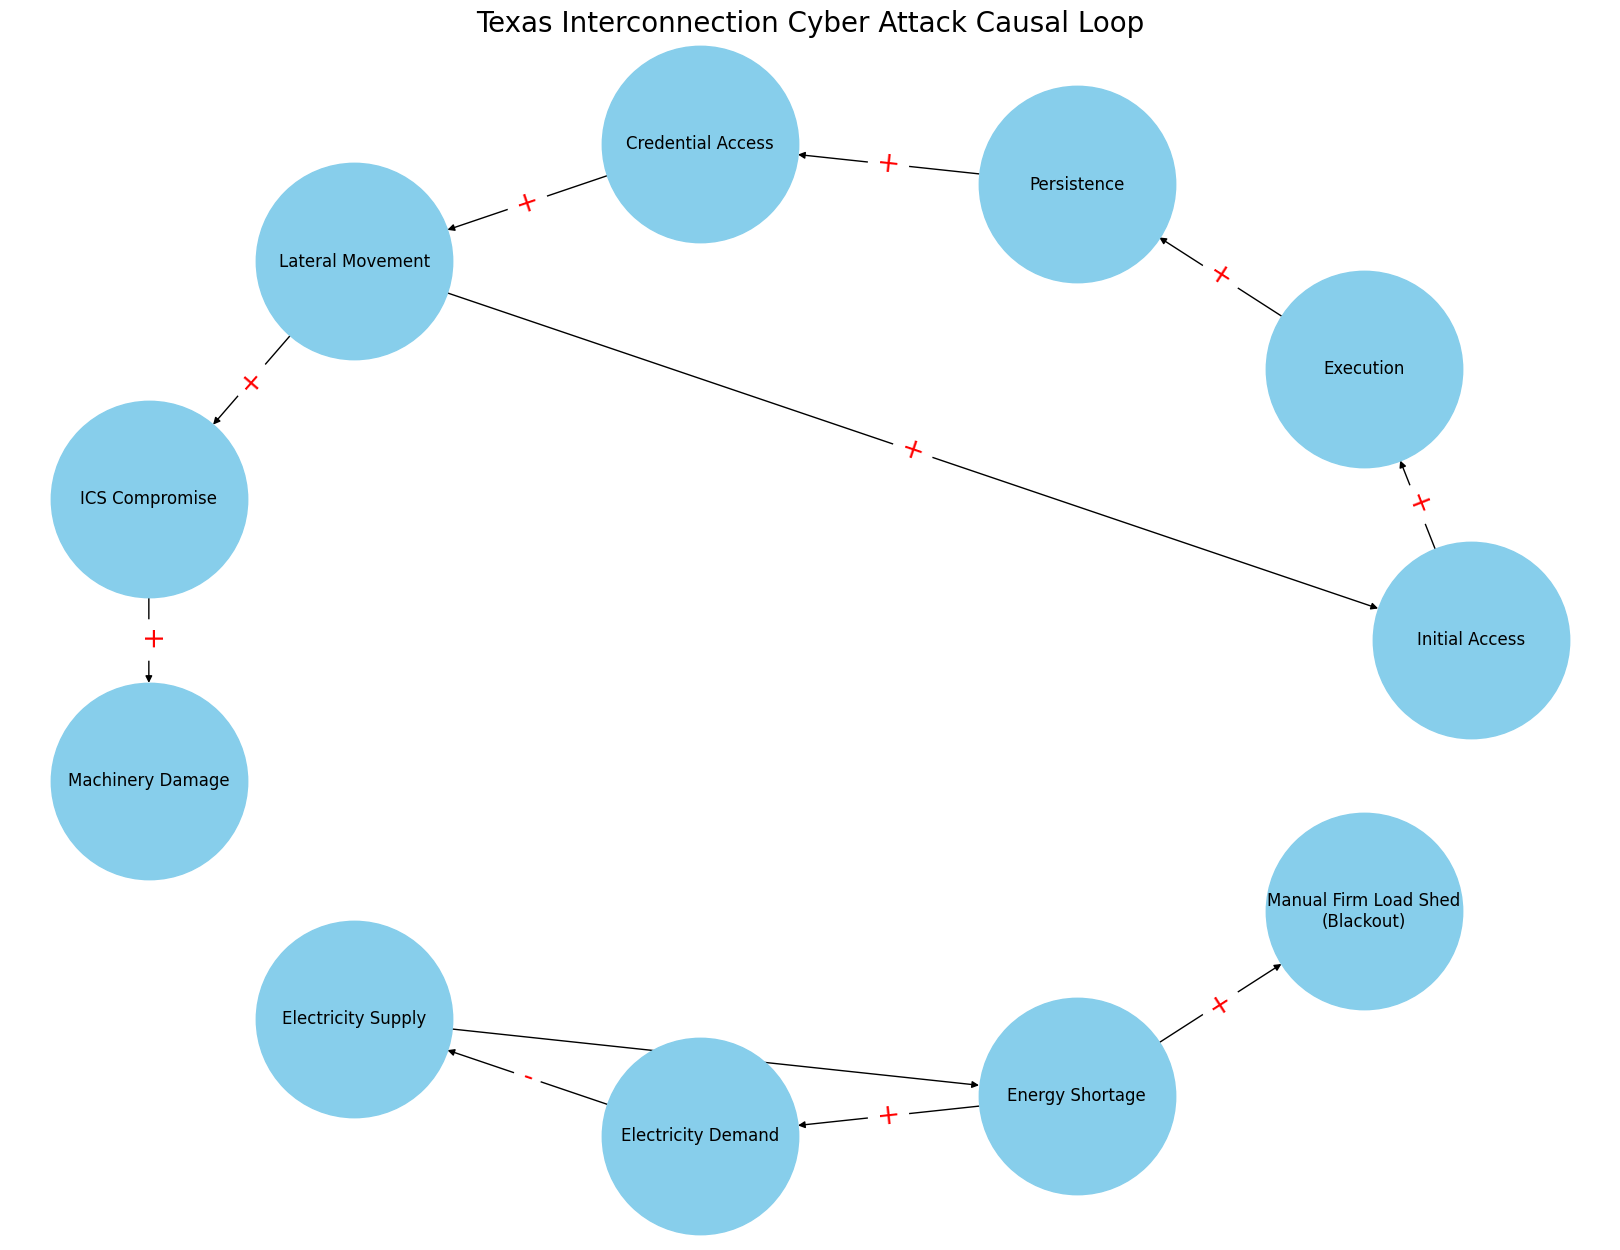

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes
nodes = [
    "Initial Access", "Execution", "Persistence", "Credential Access", "Lateral Movement", "ICS Compromise",
    "Machinery Damage",
    "Electricity Supply",  "Electricity Demand", 
    "Energy Shortage", "Manual Firm Load Shed\n(Blackout)"
]
G.add_nodes_from(nodes)

# Adding edges
edges = [
    ("Initial Access", "Execution", {'label': '+'}),
    ("Execution", "Persistence", {'label': '+'}),
    ("Persistence", "Credential Access", {'label': '+'}),
    ("Credential Access", "Lateral Movement", {'label': '+'}),
    ("Lateral Movement", "Initial Access", {'label': '+'}),
    ("Lateral Movement", "ICS Compromise", {'label': '+'}),

    ("ICS Compromise", "Machinery Damage", {'label': '+'}),
    
    ("Electricity Demand", "Electricity Supply", {'label': "-"}),
    ("Energy Shortage", "Electricity Demand", {'label': "+"}),
    ("Electricity Supply", "Energy Shortage", {'label': '-'}),
    ("Energy Shortage", "Manual Firm Load Shed\n(Blackout)", {'label': '+'}),
]
G.add_edges_from(edges)

# Graph layout
pos = nx.circular_layout(G)  # Choose your preferred layout

labels = nx.get_edge_attributes(G, 'label')  # Get edge attributes

# Drawing the graph
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=20000, edge_color='black', linewidths=1, font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red', font_size=20)
plt.title("Texas Interconnection Cyber Attack Causal Loop", fontsize=20)
plt.savefig('causal_loop.png', bbox_inches='tight')
plt.show()

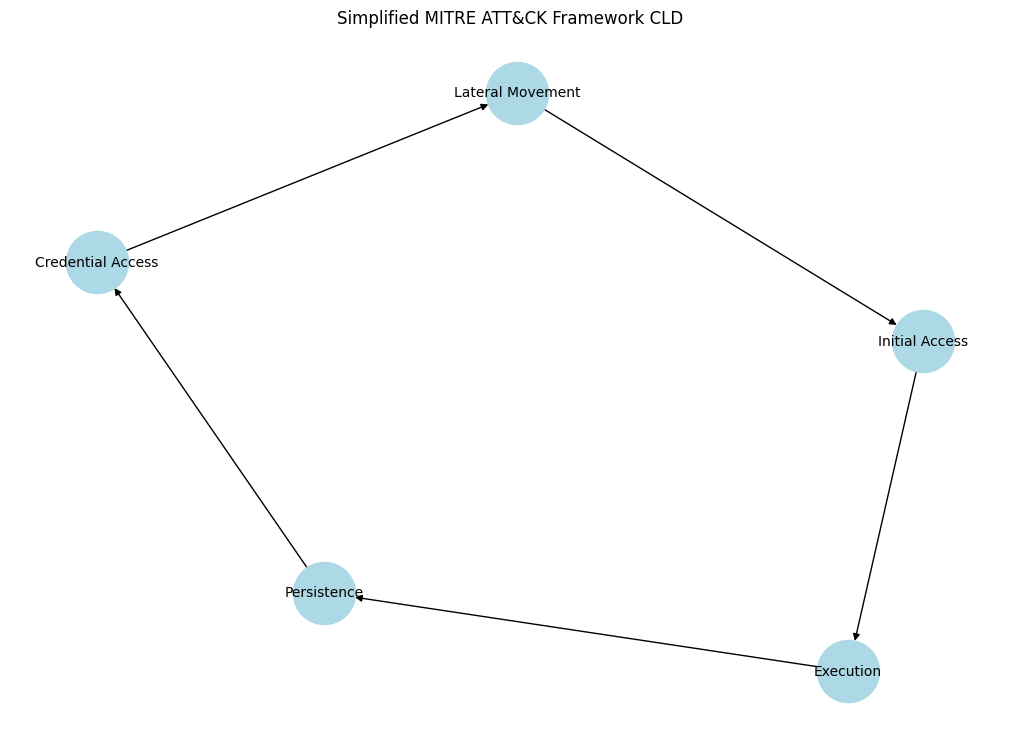

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()
# Adding tactics and techniques as nodes
G.add_nodes_from([
    "Initial Access",
    "Execution",
    "Persistence",
    "Credential Access",
    "Lateral Movement"
])
# Adding edges to represent causal relationships
G.add_edges_from([
    ("Initial Access", "Execution"),
    ("Execution", "Persistence"),
    ("Persistence", "Credential Access"),
    ("Credential Access", "Lateral Movement"),
    ("Lateral Movement", "Initial Access")  # Looping back for illustrative purposes
])
# Position nodes using the spring layout
pos = nx.spring_layout(G)

# Draw the graph
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, arrows=True)

# Draw edge labels to denote the type of influence
edge_labels = nx.get_edge_attributes(G,'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Simplified MITRE ATT&CK Framework CLD")
plt.show()


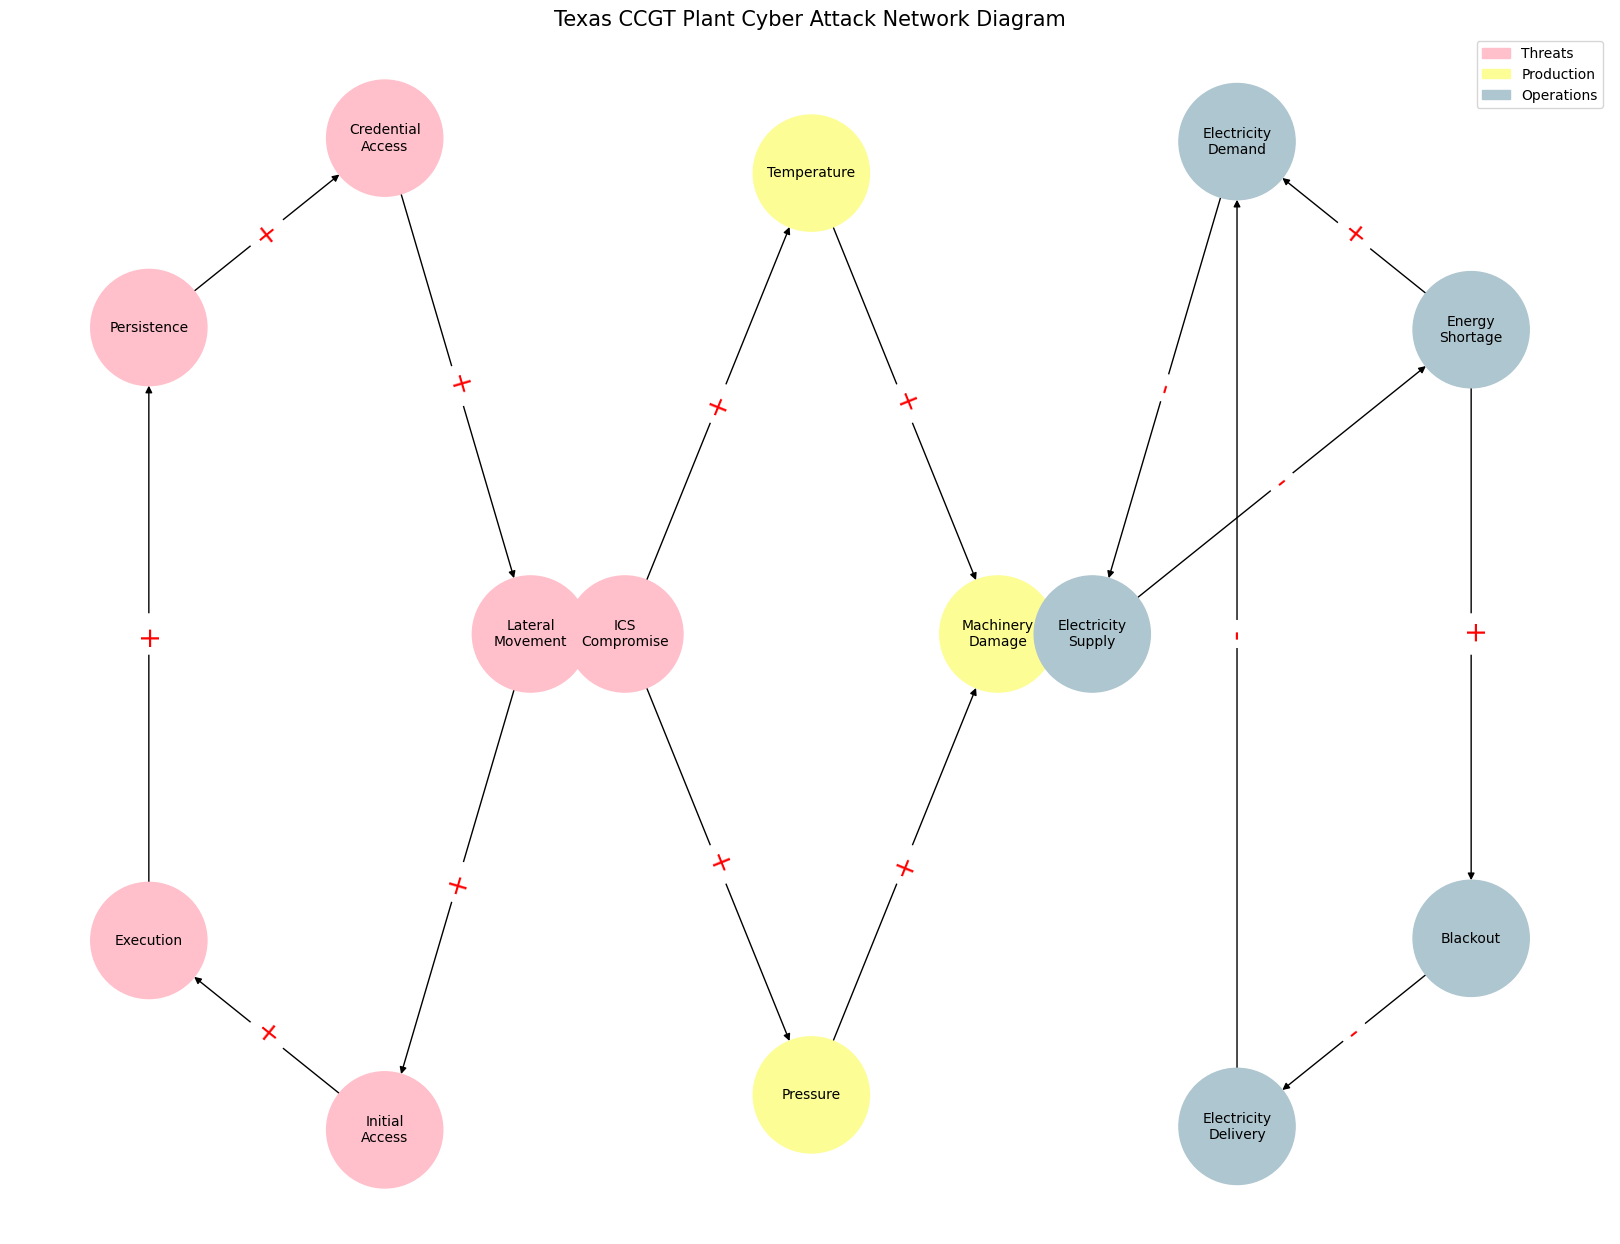

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nx

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes
threats = ["Initial\nAccess", "Execution", "Persistence", "Credential\nAccess", "Lateral\nMovement", "ICS\nCompromise"]
production = ["Temperature", "Pressure", "Machinery\nDamage"]
operations = ["Electricity\nSupply",  "Electricity\nDemand", "Energy\nShortage", "Blackout", "Electricity\nDelivery"]
nodes = threats + production + operations
G.add_nodes_from(nodes)

# Coloring nodes
node_colors = {}
red = '#FFC0CB'  # Pastel red for Threats
yellow = '#FDFD96'  # Pastel yellow for production
blue = '#AEC6CF'  # Pastel blue for DC Ties
for node in threats:
    node_colors[node] = red  # Threats
for node in production:
    node_colors[node] = yellow  # Production
for node in operations:
    node_colors[node] = blue  # Governance

colors = [node_colors[node] for node in G.nodes()]

# Adding edges
edges = [
    ("Initial\nAccess", "Execution", {'label': '+'}),
    ("Execution", "Persistence", {'label': '+'}),
    ("Persistence", "Credential\nAccess", {'label': '+'}),
    ("Credential\nAccess", "Lateral\nMovement", {'label': '+'}),
    ("Lateral\nMovement", "Initial\nAccess", {'label': '+'}),
    ("Lateral\nMovement", "ICS\nCompromise", {'label': '+'}),

    ("ICS\nCompromise", "Temperature", {'label': '+'}),
    ("ICS\nCompromise", "Pressure", {'label': '+'}),
    ("Temperature", "Machinery\nDamage", {'label': '+'}),
    ("Pressure", "Machinery\nDamage", {'label': '+'}),
    ("Machinery\nDamage", "Electricity\nSupply", {'label': '-'}),

    ("Electricity\nDemand", "Electricity\nSupply", {'label': "-"}),
    ("Energy\nShortage", "Electricity\nDemand", {'label': "+"}),
    ("Electricity\nSupply", "Energy\nShortage", {'label': '-'}),
    ("Energy\nShortage", "Blackout", {'label': '+'}),
    ("Blackout", "Electricity\nDelivery", {'label': '-'}),
    ("Electricity\nDelivery", "Electricity\nDemand", {'label': '-'}),
]

G.add_edges_from(edges)

# Use Graphviz to layout the graph
# Here, you can choose from different Graphviz algorithms by changing 'prog'
pos = graphviz_layout(G, prog='circo')  # 'dot', 'neato', 'fdp', 'sfdp', 'twopi', 'circo'
labels = nx.get_edge_attributes(G, 'label')  # Get edge attributes

# Drawing
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=7000, edge_color='black', linewidths=1, font_size=10, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red', font_size=20)

# Create a patch (color code) for each category
red_patch = mpatches.Patch(color=red, label='Threats')
yellow_patch = mpatches.Patch(color=yellow, label='Production')
blue_patch = mpatches.Patch(color=blue, label='Operations')

# Add legend to the plot
plt.legend(handles=[red_patch, yellow_patch, blue_patch], loc='best')

plt.title("Texas CCGT Plant Cyber Attack Network Diagram", fontsize=15)
plt.savefig('causal_loop.png', bbox_inches='tight')
plt.show()

# stock and flow = variables
# network diagram = physical infrastructure/groups
# who are the relevant threat actors in ICS compromise? surely China and Russia, but Iran and DPRK too?

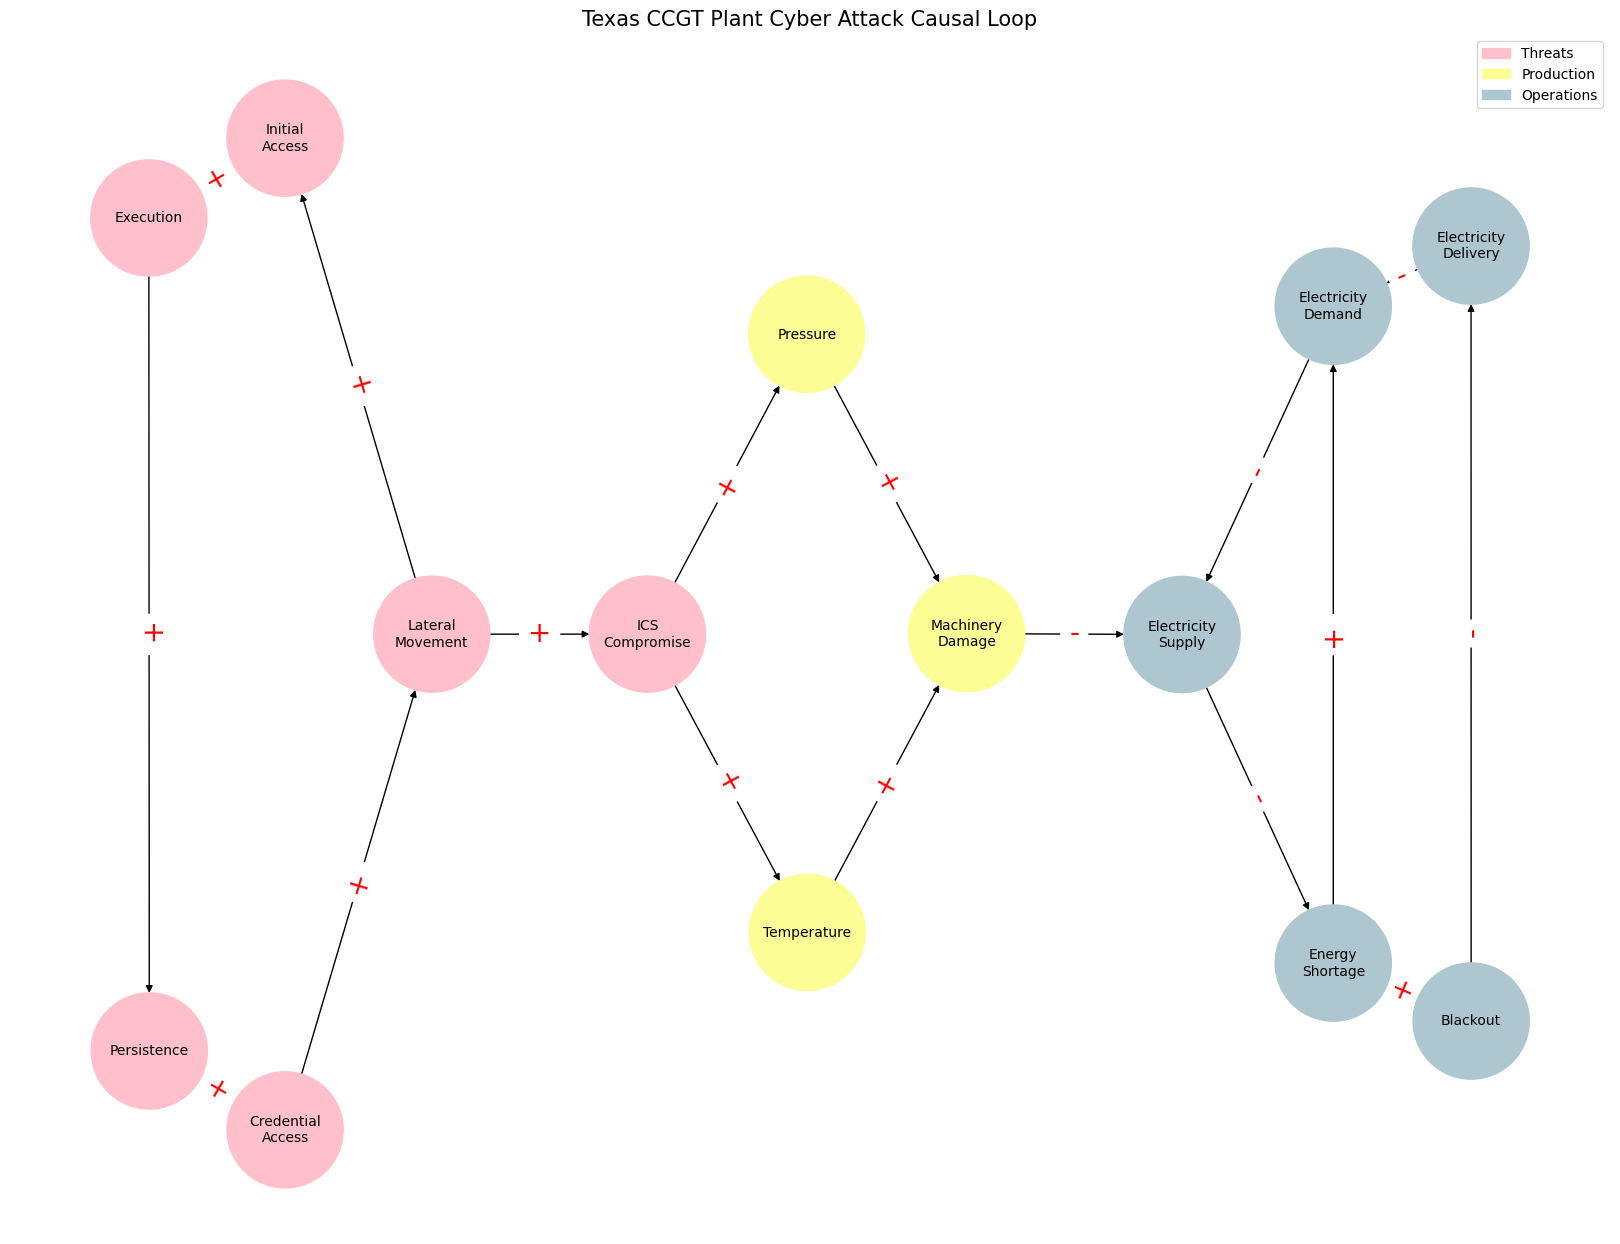

In [37]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nx

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes
threats = ["Initial\nAccess", "Execution", "Persistence", "Credential\nAccess", "Lateral\nMovement", "ICS\nCompromise"]
production = ["Temperature", "Pressure", "Machinery\nDamage"]
operations = ["Electricity\nSupply",  "Electricity\nDemand", "Energy\nShortage", "Blackout", "Electricity\nDelivery"]
nodes = operations + production + threats
G.add_nodes_from(nodes)

# Coloring nodes
node_colors = {}
red = '#FFC0CB'  # Pastel red for Threats
yellow = '#FDFD96'  # Pastel yellow for production
blue = '#AEC6CF'  # Pastel blue for DC Ties
for node in threats:
    node_colors[node] = red  # Threats
for node in production:
    node_colors[node] = yellow  # Production
for node in operations:
    node_colors[node] = blue  # Governance

colors = [node_colors[node] for node in G.nodes()]

# Adding edges
edges = [
    ("Initial\nAccess", "Execution", {'label': '+'}),
    ("Execution", "Persistence", {'label': '+'}),
    ("Persistence", "Credential\nAccess", {'label': '+'}),
    ("Credential\nAccess", "Lateral\nMovement", {'label': '+'}),
    ("Lateral\nMovement", "Initial\nAccess", {'label': '+'}),
    ("Lateral\nMovement", "ICS\nCompromise", {'label': '+'}),

    ("ICS\nCompromise", "Temperature", {'label': '+'}),
    ("ICS\nCompromise", "Pressure", {'label': '+'}),
    ("Temperature", "Machinery\nDamage", {'label': '+'}),
    ("Pressure", "Machinery\nDamage", {'label': '+'}),
    ("Machinery\nDamage", "Electricity\nSupply", {'label': '-'}),

    ("Electricity\nDemand", "Electricity\nSupply", {'label': "-"}),
    ("Energy\nShortage", "Electricity\nDemand", {'label': "+"}),
    ("Electricity\nSupply", "Energy\nShortage", {'label': '-'}),
    ("Energy\nShortage", "Blackout", {'label': '+'}),
    ("Blackout", "Electricity\nDelivery", {'label': '-'}),
    ("Electricity\nDelivery", "Electricity\nDemand", {'label': '-'}),
]

G.add_edges_from(edges)

# Use Graphviz to layout the graph
# Here, you can choose from different Graphviz algorithms by changing 'prog'

pos = graphviz_layout(G, prog='sfdp')  # 'dot', 'neato', 'fdp', 'sfdp', 'twopi', 'circo'
labels = nx.get_edge_attributes(G, 'label')  # Get edge attributes

# Drawing
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=7000, edge_color='black', linewidths=1, font_size=10, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red', font_size=20)

# Create a patch (color code) for each category
red_patch = mpatches.Patch(color=red, label='Threats')
yellow_patch = mpatches.Patch(color=yellow, label='Production')
blue_patch = mpatches.Patch(color=blue, label='Operations')

# Add legend to the plot
plt.legend(handles=[red_patch, yellow_patch, blue_patch], loc='best')

plt.title("Texas CCGT Plant Cyber Attack Causal Loop", fontsize=15)
plt.savefig('causal_loop.png', bbox_inches='tight')
plt.show()

# stock and flow = variables
# network diagram = physical infrastructure/groups
# who are the relevant threat actors in ICS compromise? surely China and Russia, but Iran and DPRK too?